# Clustering

In this notebook, we will apply clustering algorithms to different datasets to highlight specific characteristics and shortcomings.

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

## Dataset 1

Synthetic dataset with spherical clusters

In [2]:
from sklearn.datasets import make_blobs

Text(0, 0.5, 'Feature 2')

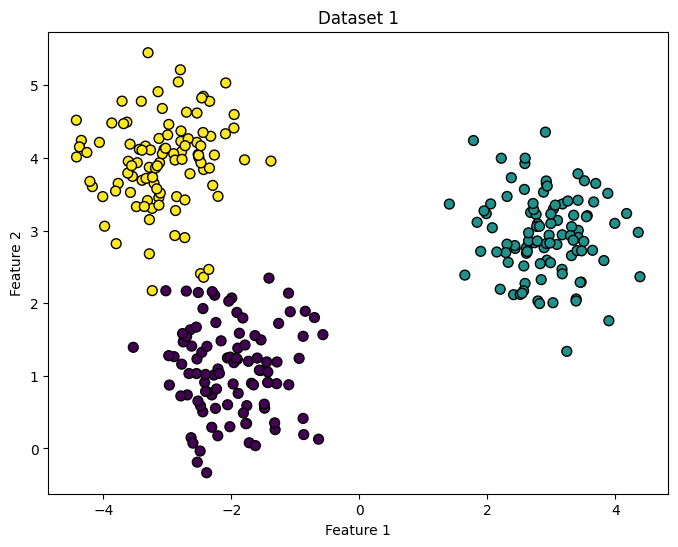

In [3]:
X, y = make_blobs(n_samples=300, centers=[(-2,1), (3,3), (-3,4)], cluster_std=0.60, random_state=0)

# Plotting the dataset and decision boundaries
plt.figure(figsize=(8, 6))

# Plotting the dataset points
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis', edgecolor='k')

plt.title("Dataset 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

### k-Means

In [4]:
def plot_decision_boundaries(ax, X, y, model, centers, title):
    if not ax:
        _, ax = plt.subplots(1, 1, figsize=(8,6))
    # Create a meshgrid to plot the decision boundaries
    x_min, x_max = X[:, 0].min() - 0.3, X[:, 0].max() + 0.3
    y_min, y_max = X[:, 1].min() - 0.3, X[:, 1].max() + 0.3
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict cluster for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotting decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='winter')
    
    # Plotting the dataset points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis', edgecolor='k')

    # Plotting the centroids
    ax.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='x')
    
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

Apply k-Means Clustering for different values of k

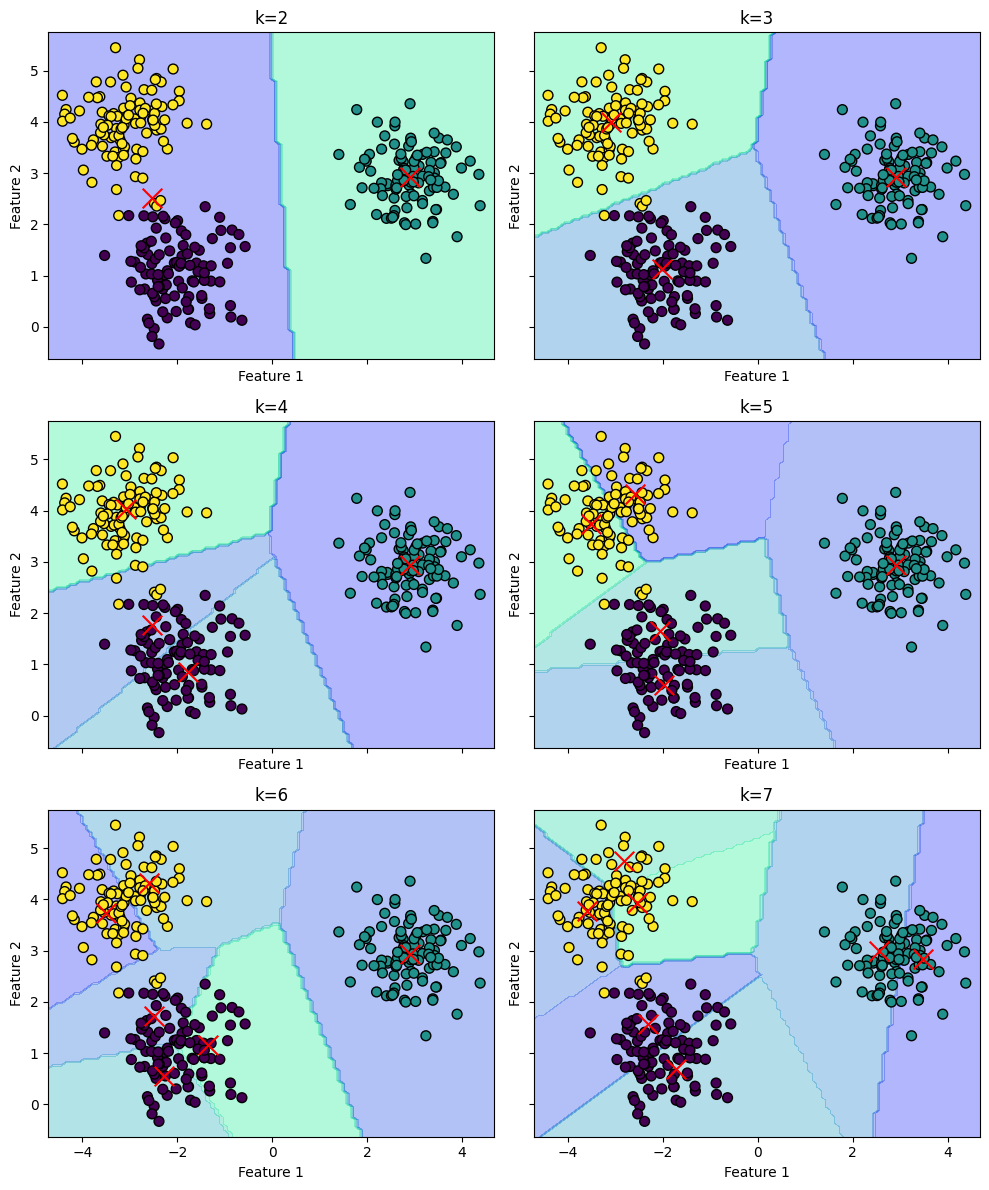

In [5]:
from sklearn.cluster import KMeans
ks = [2, 3, 4, 5, 6, 7]
k_means_models = {}
fig, axs = plt.subplots(3, 2, figsize=(10,12), sharex=True, sharey=True)

for k, ax in zip(ks, axs.ravel()):
    # Applying K-Means
    model = KMeans(n_clusters=k, n_init='auto')
    model.fit(X)
    k_means_models[k] = model

    plot_decision_boundaries(ax, X, y, model, model.cluster_centers_, f"k={k}")
plt.tight_layout()

### Evaluation

#### Intrinsic Evaluation

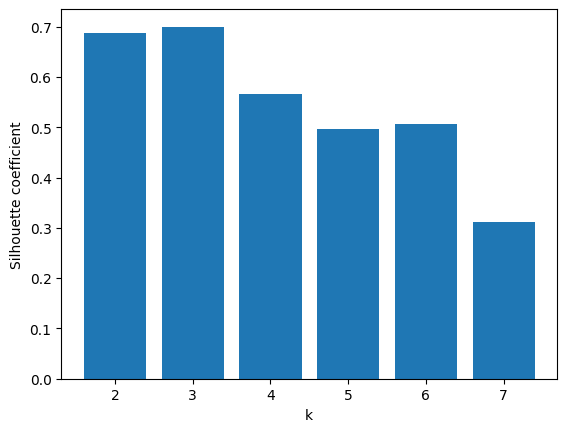

In [6]:
from sklearn.metrics import silhouette_score

scores = [silhouette_score(X, k_means_models[k].labels_, metric='euclidean') for k in ks]
plt.bar(ks, scores)
plt.xlabel('k')
plt.ylabel('Silhouette coefficient')
plt.show()

#### Extrinsic Evaluation

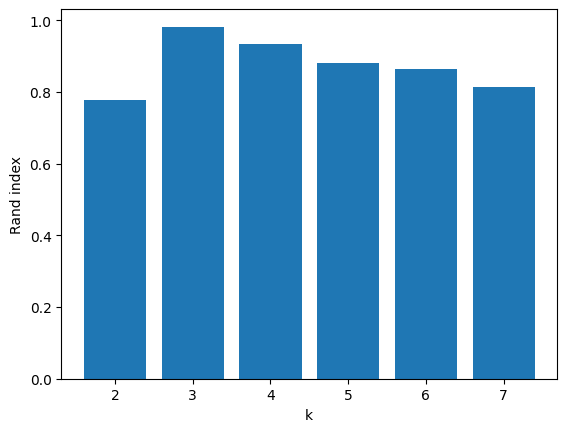

In [7]:
from sklearn.metrics import rand_score

scores = [rand_score(y, k_means_models[k].labels_) for k in ks]
plt.bar(ks, scores)
plt.xlabel('k')
plt.ylabel('Rand index')
plt.show()

### Elbow Plot

Text(0, 0.5, 'sum of squared distances')

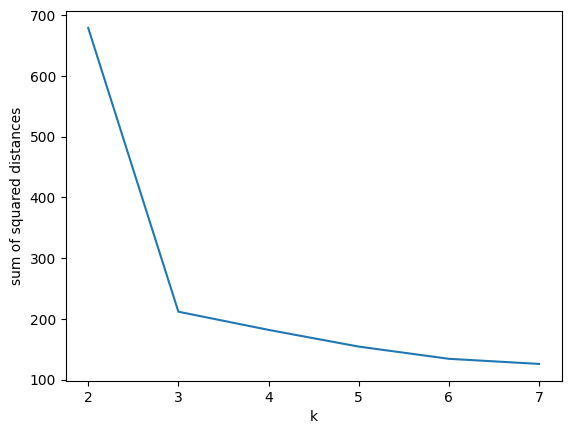

In [8]:
# Note: in scikit-learn inertia refers to the sum of squared distances of samples to their closest cluster center
sum_of_squared_distances = [k_means_models[k].inertia_ for k in ks]
plt.plot(ks, sum_of_squared_distances)
plt.xlabel('k')
plt.ylabel('sum of squared distances')

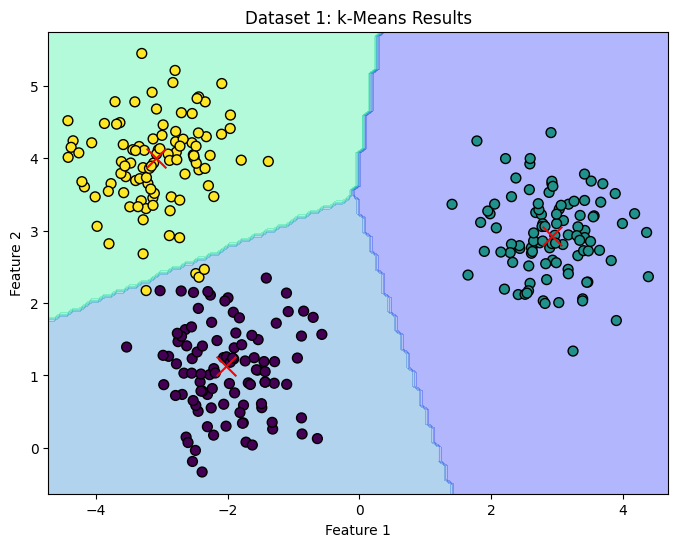

In [9]:
best_model = k_means_models[3]
plot_decision_boundaries(None, X, y, best_model, best_model.cluster_centers_, f"Dataset 1: k-Means Results")

### Contingency Matrix

k=3

In [10]:
from sklearn.metrics.cluster import contingency_matrix

contingency_matrix(y, best_model.labels_)

array([[  0, 100,   0],
       [100,   0,   0],
       [  0,   4,  96]])

k=2

In [11]:
contingency_matrix(y, k_means_models[2].labels_)

array([[100,   0],
       [  0, 100],
       [100,   0]])

### Gaussian Mixture Model

In [12]:
from scipy import linalg

normalized_values = [0.0, 0.5, 1.0]
viridis = plt.colormaps.get_cmap('winter')
colors = [viridis(value) for value in normalized_values]

def plot_gmm(X, Y_, means, covariances):
    _, ax = plt.subplots(1, 1, figsize=(8,6))
    for i, (mean, covar, color) in enumerate(zip(means, covariances,colors)):
        v, w = linalg.eigh(covar)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        if not np.any(Y_ == i):
            continue

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180.0 * angle / np.pi  # convert to degrees
        for r in [0.5,1.0,1.5,2.0,2.5,3.0]:
            ell = matplotlib.patches.Ellipse(mean, r * v[0], r * v[1], angle=180.0 + angle, color=color, alpha=0.1)
            ax.add_artist(ell)

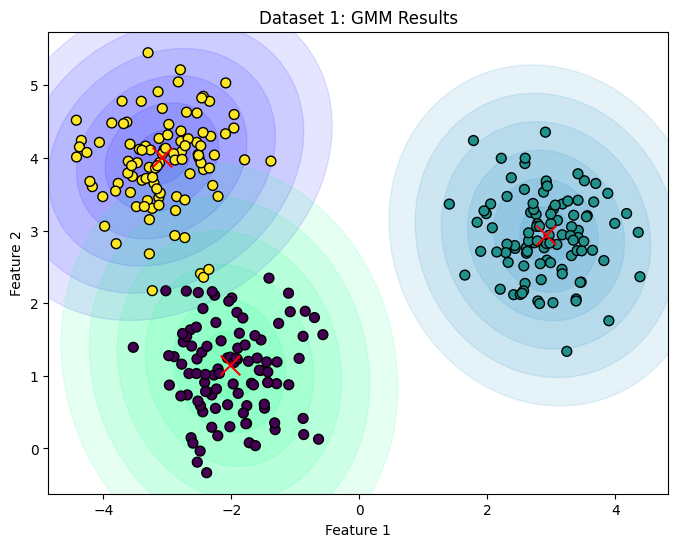

In [13]:
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

# Applying Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(X)

plot_gmm(X, y, gmm.means_, gmm.covariances_)

# Plotting the dataset points
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis', edgecolor='k')

# Plotting the means
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=200, marker='x')

plt.title("Dataset 1: GMM Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Dataset 2

Synthetic dataset with three clusters, where the 3rd cluster is stretched and overlaps with the other clusters.

In [14]:
# Generate another dataset with three clusters
X_1, y_1 = make_blobs(n_samples=200, centers=[(-2,-2),(2,2)], random_state=0)
X_2, _ = make_blobs(n_samples=100, centers=[(-4,2)], random_state=0)
y_2 = np.full(100, 2)
transformation = [[1, 0], [2, 0.5]]
X_2 = np.dot(X_2, transformation)
X = np.vstack([X_1, X_2])
y = np.concatenate([y_1, y_2])
X.shape

(300, 2)

Text(0, 0.5, 'Feature 2')

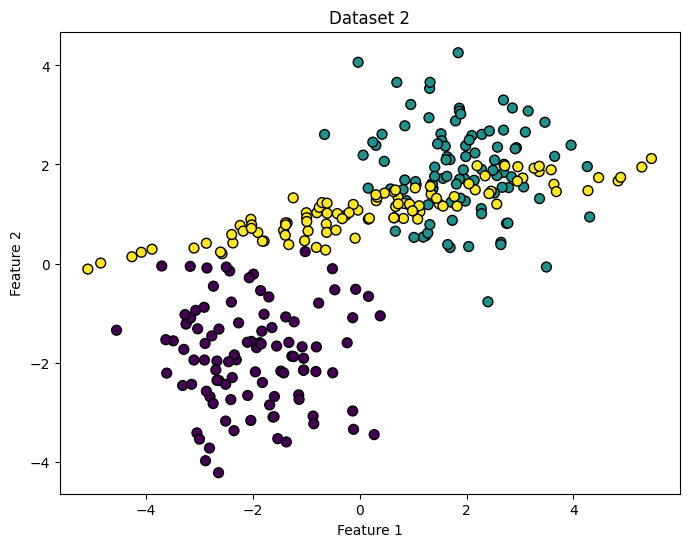

In [15]:
# Plotting the dataset and decision boundaries
plt.figure(figsize=(8, 6))

# Plotting the dataset points
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis', edgecolor='k')

plt.title("Dataset 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

### k-Means

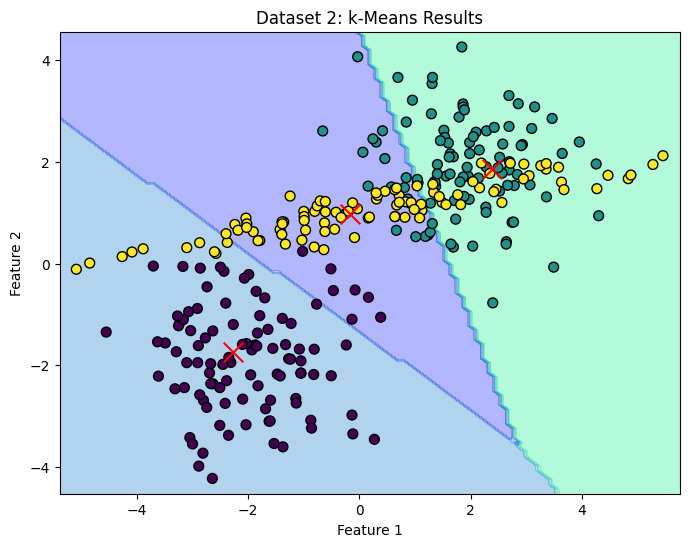

In [16]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X)

plot_decision_boundaries(None, X, y, kmeans, kmeans.cluster_centers_, "Dataset 2: k-Means Results")

### Gaussian Mixture Model

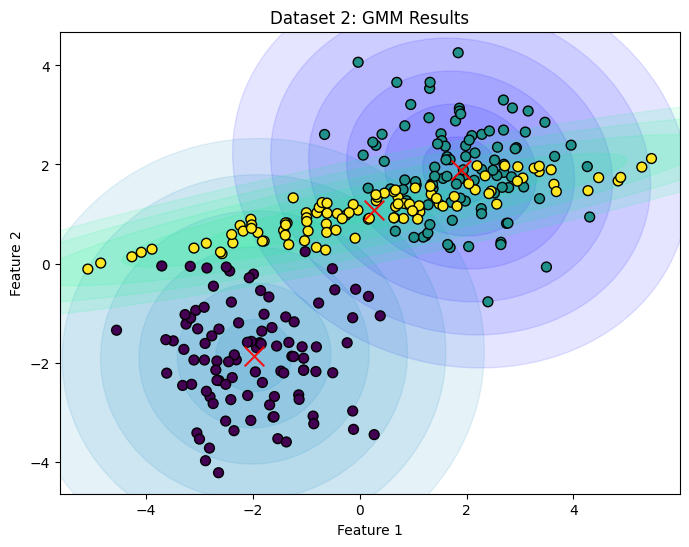

In [17]:
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

# Applying Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(X)

plot_gmm(X, y, gmm.means_, gmm.covariances_)

# Plotting the dataset points
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis', edgecolor='k')

# Plotting the means
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=200, alpha=0.9, marker='x')

plt.title("Dataset 2: GMM Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Dataset 3

Synthetic dataset of 2 moon-shaped clusters, surrounded by a circular 3rd cluster.

In [18]:
from sklearn.datasets import make_moons, make_circles

Text(0, 0.5, 'Feature 2')

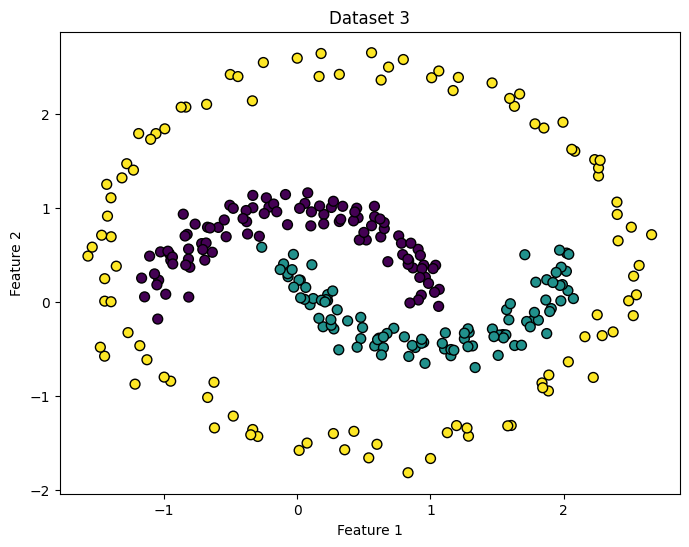

In [19]:
# Generate a dataset with three clusters
X_moon, y_moon = make_moons(n_samples=200, random_state=0, noise=0.1)
X_cirle, _ = make_circles(n_samples=100, random_state=0, noise=0.05, factor=0.9999)
y_circle =  np.full(100, 2)
X = np.vstack([X_moon, X_cirle * 2 + 0.5])
y = np.concatenate([y_moon, y_circle])

# Plotting the dataset and decision boundaries
plt.figure(figsize=(8, 6))

# Plotting the dataset points
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis', edgecolor='k')

plt.title("Dataset 3")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

### Gaussian Mixture Model

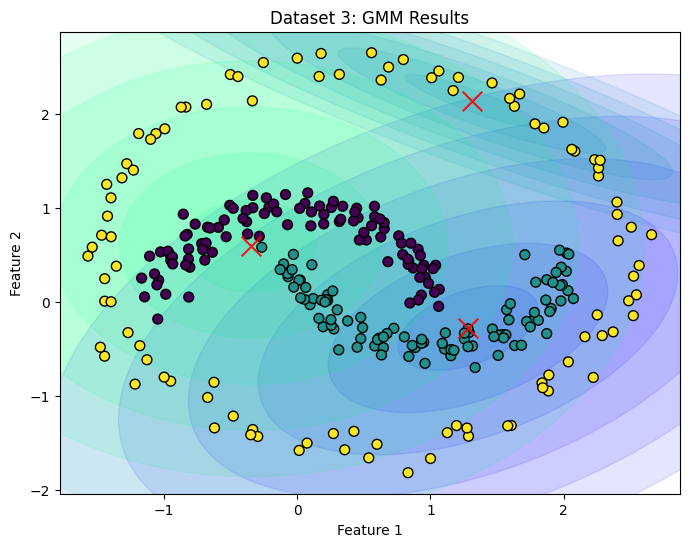

In [20]:
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

# Applying Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(X)

plot_gmm(X, y, gmm.means_, gmm.covariances_)

# Plotting the dataset points
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis', edgecolor='k')

# Plotting the means
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=200, alpha=0.9, marker='x')

plt.title("Dataset 3: GMM Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### DBSCAN

In [21]:
from sklearn.cluster import DBSCAN

# Applying DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=20)
y_dbscan = dbscan.fit_predict(X)

print('Number of clusters:', len(set(dbscan.labels_)))

Number of clusters: 3


Rand Index

In [22]:
rand_score(y, dbscan.labels_)

0.9522185061315496

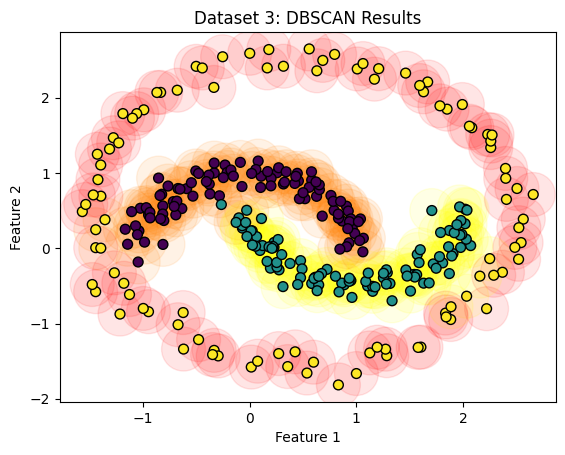

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=1000, alpha=0.1, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis', edgecolor='black')

plt.title("Dataset 3: DBSCAN Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#### Impact of Epsilon Parameter

Text(0, 0.5, 'Rand Index')

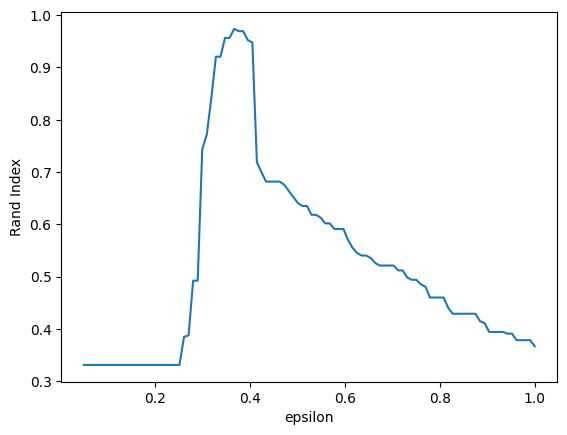

In [24]:
eps = np.linspace(0.05, 1.0, 100)
rand_scores = []
for e in eps:
    dbscan = DBSCAN(eps=e, min_samples=20)
    y_dbscan = dbscan.fit_predict(X)
    rand_scores.append(rand_score(y, y_dbscan))
plt.plot(eps, rand_scores)
plt.xlabel('epsilon')
plt.ylabel('Rand Index')

## Dataset 4

Synthetic dataset with three spherical clusters, but two of them are very close to each other.

Text(0, 0.5, 'Feature 2')

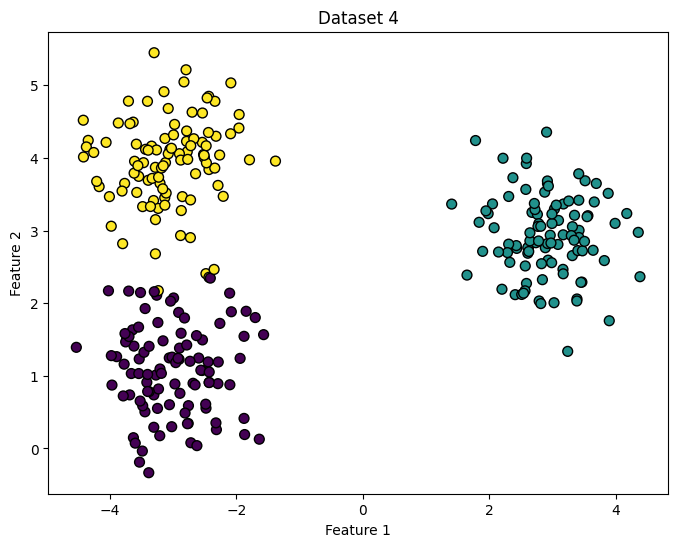

In [25]:
# Generate a dataset with three clusters
X, y = make_blobs(n_samples=300, centers=[(-3,1), (3,3), (-3,4)], cluster_std=0.60, random_state=0)

# Plotting the dataset and decision boundaries
plt.figure(figsize=(8, 6))

# Plotting the dataset points
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis', edgecolor='k')

plt.title("Dataset 4")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

### DBSCAN

In [26]:
# Applying DBSCAN
dbscan = DBSCAN(eps=1.0, metric='euclidean')
y_dbscan = dbscan.fit_predict(X)

print('Number of clusters:', len(set(dbscan.labels_)))

Number of clusters: 2


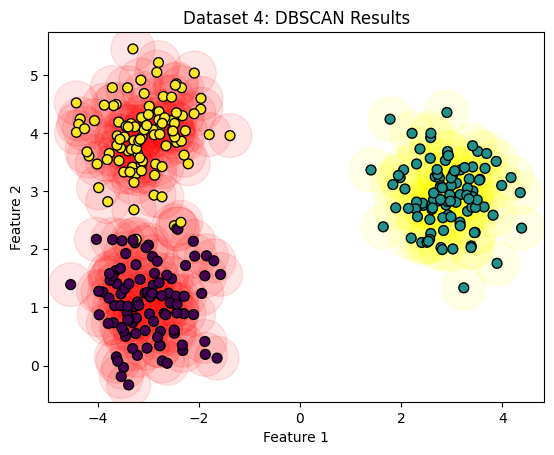

In [27]:
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=1000, alpha=0.1, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis', edgecolor='black')

plt.title("Dataset 4: DBSCAN Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Hierarchical Clustering

In [28]:
from sklearn.cluster import AgglomerativeClustering

In [29]:
threshold = 35.0
hier_model = AgglomerativeClustering(n_clusters=None, distance_threshold=threshold)
hier_model = hier_model.fit(X)

In [30]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, labels, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

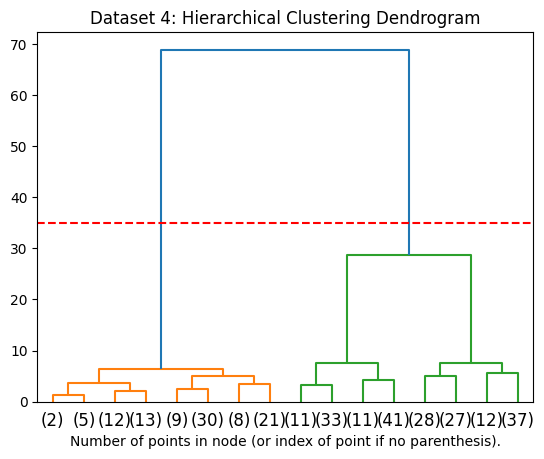

In [31]:
plt.title("Dataset 4: Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(hier_model, labels=y, truncate_mode="level", p=3, color_threshold=threshold)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.axhline(c='r',linestyle='--', y=threshold) 
plt.show()

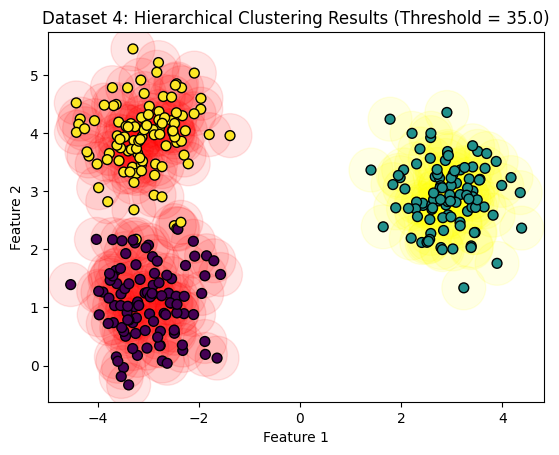

In [32]:
plt.scatter(X[:, 0], X[:, 1], c=hier_model.labels_, s=1000, alpha=0.1, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis', edgecolor='black')

plt.title(f"Dataset 4: Hierarchical Clustering Results (Threshold = {threshold})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [33]:
threshold = 20.0
hier_model = AgglomerativeClustering(n_clusters=None, distance_threshold=threshold)
hier_model = hier_model.fit(X)

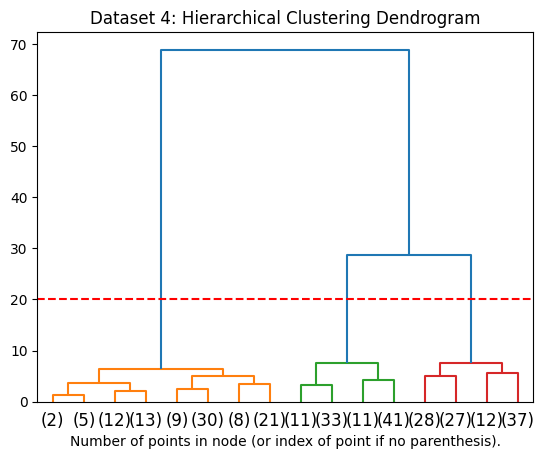

In [34]:
plt.title("Dataset 4: Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(hier_model, labels=y, truncate_mode="level", p=3, color_threshold=threshold)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.axhline(c='r',linestyle='--', y=threshold) 
plt.show()

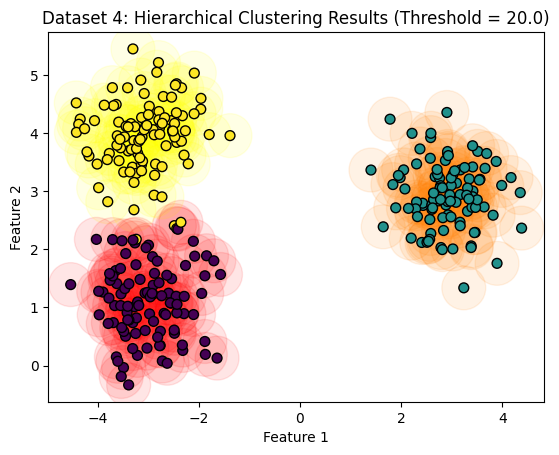

In [35]:
plt.scatter(X[:, 0], X[:, 1], c=hier_model.labels_, s=1000, alpha=0.1, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis', edgecolor='black')

plt.title(f"Dataset 4: Hierarchical Clustering Results (Threshold = {threshold})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()